[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MusicalInformatics/miws23/blob/main/expectation/intro_to_deep_learning.ipynb)

# A Very Quick and Dirty Introduction to Deep Learning and PyTorch

## Deep Learning

Deep learning is a family of machine learning techniques that is the extension of neural networks. In this case, the word *deep* refers to the fact that these neural networks are organized into many **layers**.

This short tutorial aims to be a practical introduction to deep learning using [PyTorch](https://pytorch.org/). **Parts of this tutorial are taken from PyTorch's [Introduction to PyTorch](https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html).**

### Tensors

Most computations on neural networks computations are linear algebra operations on **tensors**. Tensors can be thought as a generalization of matrices (the proper mathematical definition of tensors is a [bit more complicated](https://en.wikipedia.org/wiki/Tensor)). 

A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor, and so on. PyTorch is built around tensors!

##### Creating Tensors
We'll start with a few basic tensor manipulations. We start with ways of creating tensors

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


It is possible to override the default datatype

In [2]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


We can also initialize tensors with random values.

In [3]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


We can initialize a tensor from a numpy array

In [4]:
n = np.ones(5)
t = torch.from_numpy(n)

In [5]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


And convert the tensors back to numpy

In [6]:
numpy_tensor = t.numpy()
print(f'numpy_tensor type {type(numpy_tensor)}')

numpy_tensor type <class 'numpy.ndarray'>


##### Basic Arithmetic and Elementwise Operations

In [7]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # additon allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


**Exercise**: The following snippet results in a runtime error. Why is that? (you have to uncomment the line)

In [8]:
r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)

# r3 = r1 + r2

Elementwise operations and aggregate operations

In [9]:
r = torch.rand(2, 2) - 0.5 * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.0022, -0.6116],
        [-0.3071, -0.8297]])

Absolute value of r:
tensor([[0.0022, 0.6116],
        [0.3071, 0.8297]])

Inverse sine of r:
tensor([[-0.0022, -0.6581],
        [-0.3122, -0.9785]])

Average and standard deviation of r:
(tensor(0.3608), tensor(-0.4376))

Maximum value of r:
tensor(-0.0022)


##### Linear Algebra

In [10]:
r1 = torch.rand(2, 2) - 0.5 * 2 # values between -1 and 1
print('A random matrix, r1:')
print(r)
r2 = torch.rand(2, 2) - 0.5 * 3 # values between -1.5 and 1.5
print('A random matrix, r2:')
print(r2)

print('\nMatrix Multiplication of r1 and r2')
print(torch.matmul(r1, r2))
print('\nDeterminant of r1:')
print(torch.det(r1))
print('\nSingular value decomposition of r1:')
print(torch.svd(r1))
print('\nPseudo-inverse of r1:')
print(torch.pinverse(r1))


A random matrix, r1:
tensor([[-0.0022, -0.6116],
        [-0.3071, -0.8297]])
A random matrix, r2:
tensor([[-0.9938, -0.6531],
        [-1.2412, -1.2293]])

Matrix Multiplication of r1 and r2
tensor([[1.5067, 1.2069],
        [1.4467, 1.3495]])

Determinant of r1:
tensor(0.6984)

Singular value decomposition of r1:
torch.return_types.svd(
U=tensor([[-0.7131, -0.7011],
        [-0.7011,  0.7131]]),
S=tensor([1.3142, 0.5314]),
V=tensor([[ 0.6019,  0.7986],
        [ 0.7986, -0.6019]]))

Pseudo-inverse of r1:
tensor([[-1.3801,  0.7504],
        [ 0.3607, -1.2336]])


### Artificial Neural Networks

Neural networks have its origins in early work that tried to model biological networks of neurons in the brain [(McCulloch and Pits, 1943)](https://homes.luddy.indiana.edu/jbollen/I501F13/readings/mccullochpitts1943.pdf). For this reason, these methods are called neural networks, although the resemblance to real neural cells is just superficial.

We can understand artificial neural networks (or simply neural networks) as **complex compositions of simpler functions**. Each node within a network is called a **unit**, and each of these units calculates a weighted sum of the inputs from predecessor nodes and then applies a nonlinear function.

Let us consider the following simple case:

Let $a_j$ denote the output of unit $j$ can be computed as

$$a_j = g_j\left(\sum_{i} w_{ij}a_i + b_j\right)$$

where

* $g_j(\cdot)$ is a nonlinear **activation function** associated with unit $j$
* $w_{ij}$ is the weight attached to the link from unit $i$ to unit $j$
* $b_j$ is a scalar bias

with this convention, we can write the above equation in vector form as

$$a_j = g_j\left(\mathbf{w}_j^T\mathbf{x} + b_j\right)$$

where $\mathbf{w}_j^T$ is the vector of weights leading into unit $j$.

##### Activation Functions

Some of the most common activation functions are

* **Sigmoid** function
$$ \sigma(x) = \frac{1}{1 + \exp(-x)}$$

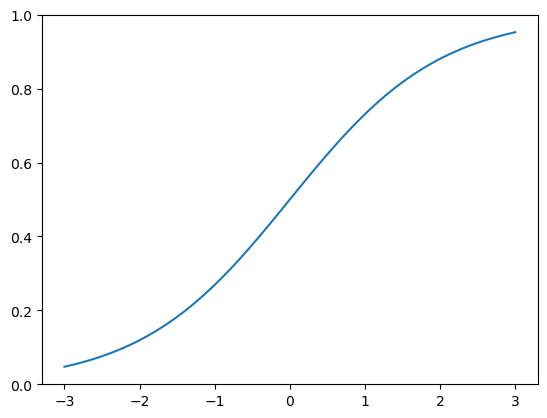

In [11]:
def sigmoid_numpy(x):
    output = 1 / (1 + np.exp(-x))
    return output
    
x = np.linspace(-3, 3)

sig_numpy = sigmoid_numpy(x)

plt.plot(x, sig_numpy)
plt.ylim((0, 1))
plt.show()
    

* **ReLU** (rectified linear units)

$$\text{ReLU}(x) = \max(0, x)$$

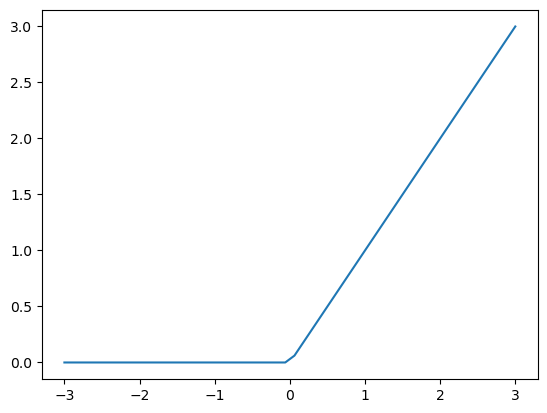

In [12]:
def relu_numpy(x):
    return np.maximum(0, x)

x = np.linspace(-3, 3)

relu = relu_numpy(x)

plt.plot(x, relu)
plt.show()


* **Hyperbolic tangent**

$$\tanh(x) = \frac{\exp(2x) - 1}{\exp(2x) + 1}$$

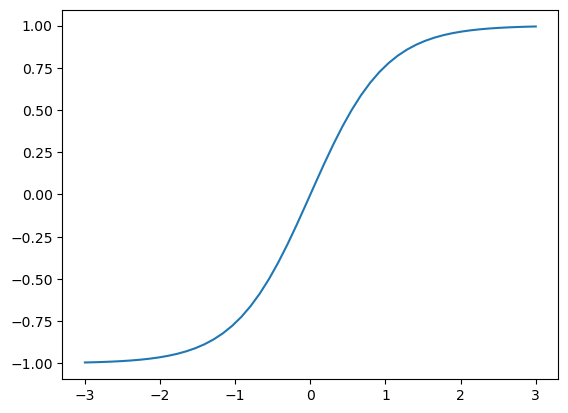

In [13]:
x = np.linspace(-3, 3)
tanh = np.tanh(x)
plt.plot(x, tanh)
plt.show()

### Computation Graphs

In the following we will consider $\mathbf{x}$ an input (training or test) example), $\hat{\mathbf{y}}$ are the outputs of the network and $\mathbf{y}$ the *true values* to derive a learning signal

* **Input Encoding**: It depends on the problem we want to model. Assume that we have $n$ input nodes
    * If we have Boolean inputs, *false* is usually mapped to $0$ and *true* to $1$, although sometimes $-1$ and $1$ are used
    * If we have real valued inputs, we can just use the actual values, although it is common to scale the inputs to fit a fixed range, or use a transformation like a log scale if the magnitudes of the different examples vary a lot.
    * If we have categorical encodings, we can use a *one-hot* encoding
    
* **Output Layers and Loss Function**: On the output side of the network, the problem of encoding raw data values into actual values $\mathbf{y}$ is very similar than the input encoding: We can use a numerical mapping for Boolean outputs, (scaled/transformed) real values for real-valued outputs, one-hot encodings for categorical data. This can be achieved by choosing an appropriate output nonlinearity:
    * For Boolean outputs, we can use the sigmoid function (if we are mapping *false* and *true* to 0 and 1, respectively), or tanh (if we are mapping to -1 and 1).
    * For categorical problems, we can use a **softmax** layer:
    $$\text{softmax}(\mathbf{in})_k = \frac{\exp(in_k)}{\sum_{l=1}^{d} \exp(in_l)}$$
    where $\mathbf{in} = (in_1, \dots, in_d)$ are the input values.
    * For regression problems, it is usual to use the identity function $g(x) = x$
    * And many more, depending on the problem (e.g., mixture density layers).
    
* **Hidden Layers**: We can think of the hidden layers as learning different *representations* for the input $\mathbf{x}$. In many cases, the $l$-th hidden layer will be given as a function of the previous layers:

$$\mathbf{h}_l(\mathbf{h}_{l-1}) = g_l(\mathbf{W}\mathbf{h}_{l-1} + \mathbf{b}_l)$$

although this form would depend on the particular neural architecture. (the above example would be for a fully connected feed forward neural network). With this notation, we can write the inputs as the $0$-th layer $\mathbf{h}_0 = \mathbf{x}$ and the outputs as the $L$-th layer, i.e., $\hat{\mathbf{y}} = \mathbf{h}_L(\mathbf{h}_{l-1})$.

##### Training the network

The **loss function** is a measure of how good the predictions of the network are, i.e., how close do the predictions of the network approximate the expected values $\mathbf{y}$. We can use this loss function to learn the parameters of the network (the sets of weights and biases) as those which minimize the loss function

$$\hat{\mathbf{\theta}} = \arg \min_{\mathbf{\theta}} \mathcal{L}(\mathbf{Y}, \hat{\mathbf{Y}})$$

For regression problems, it is common to use the mean squared error

$$\text{mse}(\mathbf{Y}, \hat{\mathbf{Y}}) = \frac{1}{N} \sum_{i}||\mathbf{y}_i - \hat{\mathbf{y}}_i||^2$$
    